In [18]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [19]:
DATADIR = 'C:\\Users\\Donia\\Desktop\\Train\\Train'
print(os.listdir(DATADIR))

['Fire', 'NoFire']


In [20]:
CATEGORIES = ['Fire', 'NoFire']

In [21]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [22]:
training_data = create_training_data()

100%|██████████| 9833/9833 [00:20<00:00, 477.48it/s] 


In [23]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

12879
1
1
1
1
1
1
0
1
1
1


In [24]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)
# try to get around split error
Y = np.asarray(Y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 average_pooling2d_3 (Avera  (None, 31, 31, 16)        0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)       

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
type(Y)

numpy.ndarray

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define the data generator
train_generator = datagen.flow(X_train, Y_train, batch_size=32)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit_generator(train_generator,
                               epochs=50,
                               verbose=1,
                               validation_data=(X_val, Y_val),
                               callbacks=[early_stopping])


Epoch 1/50


C:\Users\Donia\AppData\Local\Temp\ipykernel_320\1824055020.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


282/282 [==============================] - 21s 71ms/step - loss: 0.3635 - accuracy: 0.8268 - val_loss: 0.2870 - val_accuracy: 0.8709
Epoch 2/50
282/282 [==============================] - 20s 70ms/step - loss: 0.2801 - accuracy: 0.8642 - val_loss: 0.2433 - val_accuracy: 0.8784
Epoch 3/50
282/282 [==============================] - 20s 72ms/step - loss: 0.2643 - accuracy: 0.8738 - val_loss: 0.2374 - val_accuracy: 0.8910
Epoch 4/50
282/282 [==============================] - 21s 74ms/step - loss: 0.2661 - accuracy: 0.8803 - val_loss: 0.2361 - val_accuracy: 0.8882
Epoch 5/50
282/282 [==============================] - 21s 75ms/step - loss: 0.2595 - accuracy: 0.8839 - val_loss: 0.2296 - val_accuracy: 0.8900
Epoch 6/50
282/282 [==============================] - 22s 78ms/step - loss: 0.2542 - accuracy: 0.8890 - val_loss: 0.2294 - val_accuracy: 0.8998
Epoch 7/50
282/282 [==============================] - 22s 78ms/step - loss: 0.2520 - accuracy: 0.8865 - val_loss: 0.2287 - val_accuracy: 0.8931
Epo

In [84]:
modell=model.save('TrainedModels/Fire-64x64-color-v7.1-soft.h5')

G:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(X_val, Y_val)

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


121/121 [==============================] - 2s 12ms/step - loss: 0.1735 - accuracy: 0.9218
Validation Loss: 0.17348603904247284
Validation Accuracy: 0.921842634677887


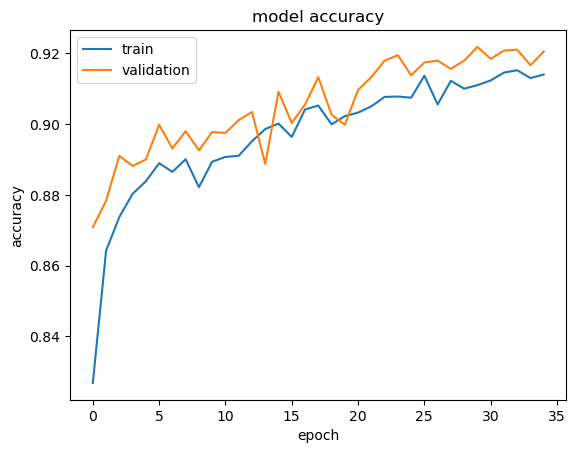

In [32]:
from matplotlib import pyplot as plt
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

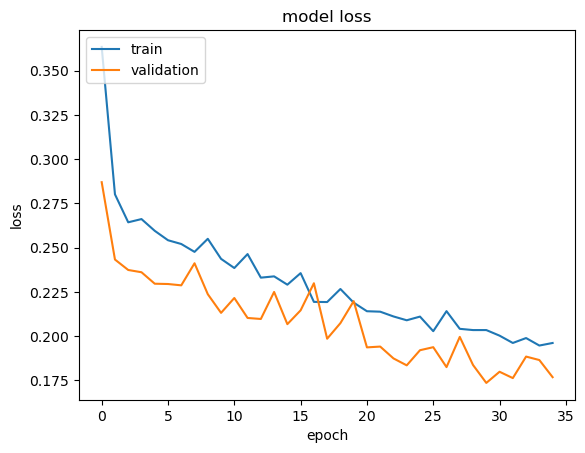

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [36]:
DATADIR1 = 'C:\\Users\\Donia\\Desktop\\test\\test'
print(os.listdir(DATADIR))

['fire', 'nofire']


In [37]:
CATEGORIES = ['fire', 'nofire']

In [39]:
IMG_SIZE = 64
def create_test_data():
    test_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR1,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return test_data

In [41]:
test_data = create_test_data()

100%|██████████| 2361/2361 [00:17<00:00, 132.05it/s]


In [42]:
2036+2361

4397

In [67]:
import random

test_image_num=4397
print(len(test_data))
random.shuffle(test_data)
test_labels=np.zeros((test_image_num,1))

c=0
for sample in test_data:
    test_labels[c]=(sample[1])
    c+=1
print(c)
actual_labels=(test_labels.reshape(test_image_num,))
print(actual_labels.shape)
actual_labels.astype(int)

4397
4397
(4397,)


array([0, 1, 1, ..., 1, 0, 0])

In [68]:
X = []
Y = []

for features,label in test_data:
    X.append(features)
    Y.append(label)

# try to get around split error
Y = np.asarray(Y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [69]:
test_image_num

4397

In [74]:
# Get the predicted probabilities for each class
predicted_probabilities = model.predict(X)

# Extract the class with the highest probability for each sample
predicted_labels = np.argmax(predicted_probabilities, axis=1)

138/138 [==============================] - 2s 11ms/step


In [75]:
#predicted_labels=model.predict_classes(X)
predicted_labels=(predicted_labels.reshape(test_image_num,))
predicted_labels.astype(int)

array([0, 1, 1, ..., 1, 1, 1])

In [77]:
from sklearn.metrics import confusion_matrix 
import itertools

Confusion matrix, without normalization
[[1340  696]
 [ 236 2125]]


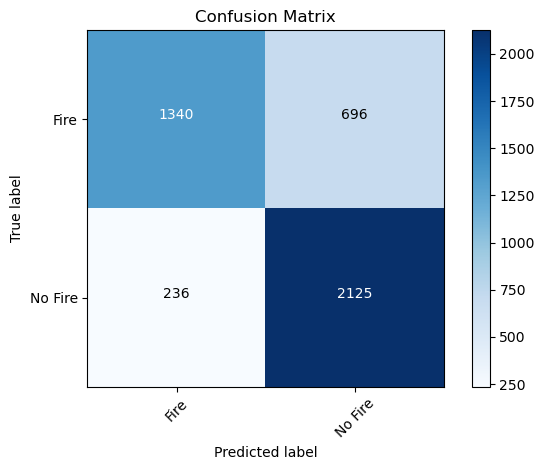

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(actual_labels, predicted_labels)
#test_batches.class_indices
cm_plot_labels=['Fire','No Fire']
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')

In [81]:
import time

In [92]:
cap = cv2.VideoCapture(r'Fireee.mkv')

In [93]:
cap

< cv2.VideoCapture 0000027D375FC130>

In [94]:
cap = cv2.VideoCapture(r'Fireee.mkv')
time.sleep(2)
if cap.isOpened(): # try to get the first frame
    rval, frame = cap.read()
else:
    rval = False

IMG_SIZE = 64
# IMG_SIZE = 224

#for i in range(2500):
#    cap.read()



while(1):

    rval, image = cap.read()
    if rval==True:
        orig = image.copy()
        
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        
        tic = time.time()
        fire_prob = modell.predict(image)[0][0] * 100
        toc = time.time()
        print("Time taken = ", toc - tic)
        print("FPS: ", 1 / np.float64(toc - tic))
        print("Fire Probability: ", fire_prob)
        print("Predictions: ", modell.predict(image))
        print(image.shape)
        
        label = "Fire Probability: " + str(fire_prob)
        cv2.putText(orig, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)

        cv2.imshow("Output", orig)
        
        key = cv2.waitKey(10)
        if key == 27: # exit on ESC
            break
    elif rval==False:
            break
end = time.time()


cap.release()
cv2.destroyAllWindows()